Inspired from https://colab.research.google.com/drive/1KOn08bKd7ornnTZEyKWeaTtaTZOXDMUe#scrollTo=E9FROGm-KGEG

Udacity lesson:  Introduction to the Deep Learning




### Goal:-



We have to determine the classification of the flowers from the data sets with the help of the image augmentation

In [0]:
### Python imports

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import shutil
import glob

In [0]:
import matplotlib.pyplot as plt

In [0]:


### Data Collections

_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_base = tf.keras.utils.get_file(origin=_URL, extract=True, fname='flowers_photos.tgz')

228818944/228813984 [==============================] - 1s 0us/step


In [0]:
zip_base

'/root/.keras/datasets/flowers_photos.tgz'

In [0]:
base_dir = os.path.join(os.path.dirname(zip_base),'flower_photos')

In [0]:
base_dir

'/root/.keras/datasets/flower_photos'

In [0]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


We have 5 catrgory of flowers in the datasets,
They are:-


(1) Daisy

(2) Dandelion

(3) Roses

(4) Sunflowers

(5) Tulips




In [0]:
classes = ['daisy', 'tulips', 'roses', 'sunflowers', 'dandelion']

We will move 80% of the data in training directory and remaining in the validation directory as these directories are not present in the datasets."



In [0]:
if not os.path.exists(os.path.join(base_dir, 'train')):
    os.makedirs(os.path.join(base_dir, 'train'))
if not os.path.exists(os.path.join(base_dir, 'validation')):
    os.makedirs(os.path.join(base_dir, 'validation'))

In [0]:
# check the above logic

!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  train  tulips  validation


In [0]:
for data in classes:
    image_path = os.path.join(base_dir, data)
    print(image_path)
    images = glob.glob(image_path + '/*.jpg')
    len_images = int(len(images) * 0.8)
    print("fraction: {} out of {}".format(len_images, len(images)))
    train, val = images[:len_images], images[len_images:]

    for t in train:
        if  not os.path.exists(os.path.join(base_dir, 'train', data)):
            os.makedirs(os.path.join(base_dir, 'train',data))
        shutil.move(t, os.path.join(base_dir, 'train', data))

    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val',data)):
            os.makedirs(os.path.join(base_dir, 'val', data))
        shutil.move(v, os.path.join(base_dir, 'val', data))
    

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

/root/.keras/datasets/flower_photos/daisy
fraction: 506 out of 633
/root/.keras/datasets/flower_photos/tulips
fraction: 639 out of 799
/root/.keras/datasets/flower_photos/roses
fraction: 512 out of 641
/root/.keras/datasets/flower_photos/sunflowers
fraction: 559 out of 699
/root/.keras/datasets/flower_photos/dandelion
fraction: 718 out of 898


In [0]:
# !ls /root/.keras/datasets/flower_photos/train/daisy
print(len(train_dir))
print(len(val_dir))

41
39


## Data Augmentation

In [0]:
BATCH_SIZE = 100
IMG_SHAPE= 150

In [0]:
## applying all the modifications in the one method


image_gen_train = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     zoom_range=0.5,
                                     rotation_range=0.45,
                                     height_shift_range=0.15,
                                     width_shift_range=0.15)

In [0]:
image_gen_train

In [0]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    shuffle=True,
    directory=train_dir,
    class_mode='sparse'
)

Found 2934 images belonging to 5 classes.


In [0]:
### lets see the image

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


In [0]:
def plotImages(images_array):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_array, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
        


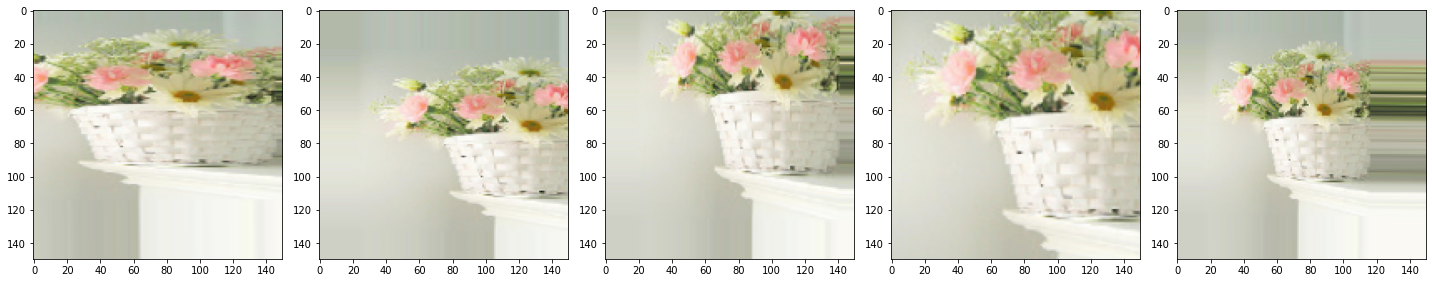

In [0]:
plotImages(augmented_images)

In [0]:
### same for validation data


image_gen_val = ImageDataGenerator(rescale=1./255)


val_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    target_size=(IMG_SHAPE,IMG_SHAPE),
    class_mode='sparse',
    directory=val_dir
)

Found 736 images belonging to 5 classes.


In [0]:
### Create the model with 3 conv + max layers


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [0]:
### Compile the model


model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [0]:
### Train the model

epochs = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n)/float(BATCH_SIZE)),
    validation_data = val_data_gen,
    epochs=epochs,
    validation_steps=int(np.ceil(val_data_gen.n)/float(BATCH_SIZE))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
29/29 [==============================] - 24s 836ms/step - loss: 1.7023 - accuracy: 0.2759 - val_loss: 1.3942 - val_accuracy: 0.4029
Epoch 2/50
29/29 [==============================] - 25s 850ms/step - loss: 1.2679 - accuracy: 0.4460 - val_loss: 1.3126 - val_accuracy: 0.4586
Epoch 3/50
29/29 [==============================] - 25s 848ms/step - loss: 1.1711 - accuracy: 0.5007 - val_loss: 1.1767 - val_accuracy: 0.5157
Epoch 4/50
29/29 [==============================] - 25s 856ms/step - loss: 1.0544 - accuracy: 0.5641 - val_loss: 1.1011 - val_accuracy: 0.5700
Epoch 5/50
29/29 [==============================] - 24s 838ms/step - loss: 0.9828 - accuracy: 0.6062 - val_loss: 1.0245 - val_accuracy: 0.6029
Epoch 6/50
29/29 [==============================] - 24s 835ms/step - loss: 0.9469 - accuracy: 0.6242 - val_loss: 0.9480 - val_accuracy: 0.6557
Epoch 7/50
29/29 [==============================] - 24s 834ms/step

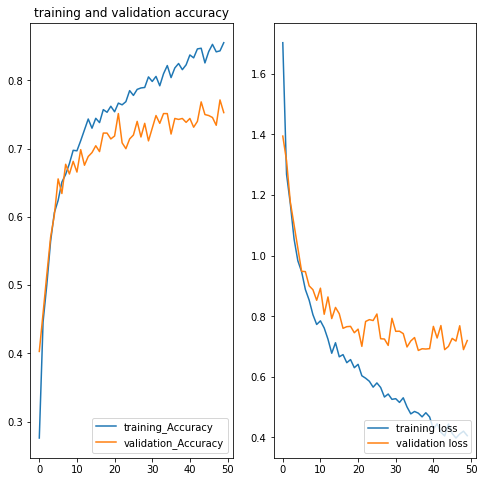

In [0]:
## EVALUATE THE DATA


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='training_Accuracy')
plt.plot(epochs_range, val_acc, label='validation_Accuracy')
plt.title('training and validation accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='lower right')

plt.show()